<a href="https://colab.research.google.com/github/Diyalokulwar/fraud-detection-ml/blob/main/ML_FA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For imbalance handling
from imblearn.over_sampling import SMOTE

# Upload the file
uploaded = files.upload()

# Load the dataset
filename = "fraud_cleaned.xlsx"
df = pd.read_excel(filename)

Saving fraud_cleaned.xlsx to fraud_cleaned (6).xlsx


In [ ]:
# Check initial missing values
print("Missing values before imputation:\n", df.isnull().sum())

Missing values before imputation:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
df.type.value_counts()

,count
type,
PAYMENT,2587
CASH_IN,1081
CASH_OUT,631
TRANSFER,437
DEBIT,263


In [ ]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
                values=quantity,
                names=transactions,hole=0.5,
                title ="Distribution of Transaction Type")
figure.show()

In [ ]:
# Map 'type' column before imputation so it's numeric
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBT": 5})

# Feature selection
features = ["type", "amount", "oldbalanceOrg", "newbalanceOrig"]

# Impute missing values in feature columns
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Ensure target variable is clean
df["isFraud"] = df["isFraud"].astype(int)

# Confirm no missing values now
print("Missing values after imputation:\n", df[features + ['isFraud']].isnull().sum())


Missing values after imputation:
 type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
isFraud           0
dtype: int64


In [ ]:
# Correlation analysis
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
print("\nCorrelation with 'isFraud':\n", correlation["isFraud"].sort_values(ascending=False))



Correlation with 'isFraud':
 isFraud           1.000000
amount            0.228087
step              0.035104
type              0.016614
oldbalanceOrg    -0.004566
newbalanceDest   -0.008250
oldbalanceDest   -0.028906
newbalanceOrig   -0.037960
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


In [ ]:
# Prepare feature matrix and target
X = df[features]
y = df["isFraud"]

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=42)


In [ ]:
# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_resampled, y_resampled)
log_pred = log_model.predict(X_test)


In [ ]:
# Train Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_resampled, y_resampled)
svm_pred = svm_model.predict(X_test)

In [ ]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")


Logistic Regression Performance:
Confusion Matrix:
[[432  63]
 [  1   4]]


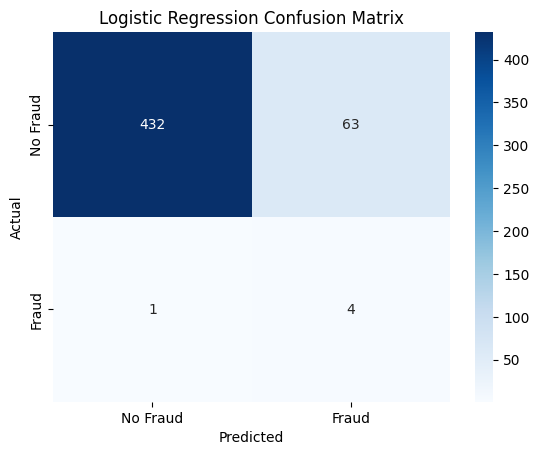

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       495
           1       0.06      0.80      0.11         5

    accuracy                           0.87       500
   macro avg       0.53      0.84      0.52       500
weighted avg       0.99      0.87      0.92       500

Accuracy: 87.20%

Support Vector Machine (SVM) Performance:
Confusion Matrix:
[[461  34]
 [  1   4]]


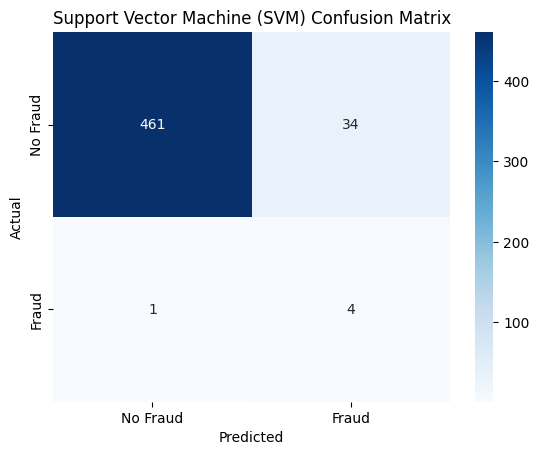

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       495
           1       0.11      0.80      0.19         5

    accuracy                           0.93       500
   macro avg       0.55      0.87      0.57       500
weighted avg       0.99      0.93      0.96       500

Accuracy: 93.00%


In [ ]:
# Evaluate both models
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Support Vector Machine (SVM)", y_test, svm_pred)